In [1]:
#
# Modelo predador-presa 
# Na ausência de predadores, a população de presas obedece a uma equação logística.
#
# Esse exemplo foi retirado do livro Differential equations - 4th edition - Paul Blanchard, Robert Devaney e Glenn R. Hall
# Uma parte dos scripts foi extraída do seguinte endereço: https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html
#
# Capítulo 2 - First order systems.
#

In [28]:
import numpy as np
import pylab as p
from numpy.linalg import eig

In [3]:
Delta_t   = 0.0010
t_init    = 0.0
t_end     = 40
num_steps = int((t_end - t_init) / Delta_t)
ttot      = np.linspace(t_init, t_end, num_steps)

### Sistema

$\frac{dR}{dt} = 2*R*(1 - \frac{R}{2}) - 1.2*R*F$

$\frac{dF}{dt} = -F + 0.9*R*F$

Nesse sistema de equações diferenciais, $R$ é a presa (rabbit, coelho) e $F$ é o predador (fox, raposa). A interação ocorre quando ambos se encontram. Nesse caso há prejuízo para a quantidade de coelhos e lucro para a quantidade de raposas.

Os pontos de equilíbrio desse sistema, quando ambas as equações diferenciais se igualam a zero, são os seguintes:

. $(0,0), (2,0)$ e $(\frac{10}{9},\frac{20}{27})$


In [5]:
def dX_dt(r,f):
    vector = np.array([  2*r*(1-r/2) - 1.2*r*f,
                        -f + 0.9*r*f])
    
    return vector

In [6]:
def plot_evolution_fox_rabbits(X,Y):
    rabbits = X
    foxes   = Y

    f1 = p.figure()
    p.plot(ttot, rabbits, 'r-', label='Rabbits')
    p.plot(ttot, foxes  , 'b-', label='Foxes')
    p.grid()
    p.legend(loc='best')
    p.xlabel('time')
    p.ylabel('population')
    p.title('Evolution of fox and rabbit populations')
    f1.savefig('rabbits_and_foxes_1.png')

In [7]:
def phase_plane(X,Y):  
#
# Phase plane
#
    rabbits = X
    foxes   = Y

    f1 = p.figure()
    p.plot(rabbits, foxes, 'b-', label='Rabbits x Foxes')
    p.grid()
    p.legend(loc='best')
    p.xlabel('Rabbits')
    p.ylabel('Foxes')
    p.title('Phase plane of fox and rabbit populations')
    f1.savefig('rabbits_and_foxes_2.png')

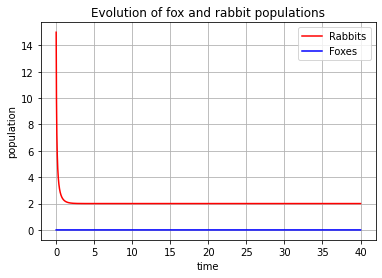

In [12]:
#
#  Nesse primeiro experimento, não há predadores. Número de raposas é zero.
#
# Euler's method
#
# Não é o melhor, mas é o mais simples.
#
#
# X - rabbits
# Y - foxes
#
X = np.array([15])
Y = np.array([0.0])

for t in range(1, num_steps):
    factors = dX_dt(X[t-1],Y[t-1])

    xnew = X[t-1] + factors[0]*Delta_t
    ynew = Y[t-1] + factors[1]*Delta_t
    
    X = np.append(X, xnew)
    Y = np.append(Y, ynew)
    
plot_evolution_fox_rabbits(X,Y)

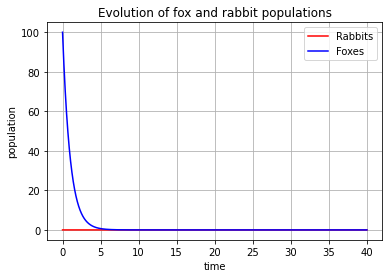

In [14]:
#
#  Aqui não há presas, apenas predadores. Como não há alimento, a tendência é que os predadores comecem a morrem e,
#  eventualmente o número de predadores chegue a zero.
#
# X - rabbits
# Y - foxes
#
X = np.array([0])
Y = np.array([100.0])

for t in range(1, num_steps):
    factors = dX_dt(X[t-1],Y[t-1])

    xnew = X[t-1] + factors[0]*Delta_t
    ynew = Y[t-1] + factors[1]*Delta_t
    
    X = np.append(X, xnew)
    Y = np.append(Y, ynew)
    
plot_evolution_fox_rabbits(X,Y)

[3.         2.9826     2.96532848 ... 1.11111111 1.11111111 1.11111111]
[4.         4.0068     4.01354881 ... 0.74074074 0.74074074 0.74074074]


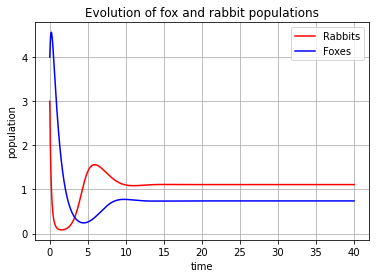

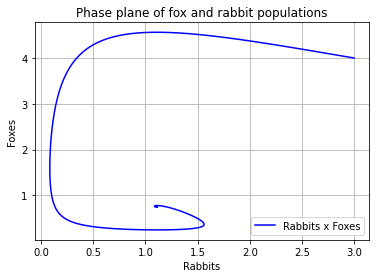

In [15]:
#
#  Nesse outro experimento, há predadores e presas. 
#
# X - rabbits
# Y - foxes
#
X = np.array([3])
Y = np.array([4])

for t in range(1, num_steps):
    factors = dX_dt(X[t-1],Y[t-1])

    xnew = X[t-1] + factors[0]*Delta_t
    ynew = Y[t-1] + factors[1]*Delta_t
    
    X = np.append(X, xnew)
    Y = np.append(Y, ynew)
    
plot_evolution_fox_rabbits(X,Y)
phase_plane(X,Y)
print(X)
print(Y)

Note-se que a tendência é o número de raposas e de coelhos convergir para o terceiro ponto de equilíbrio:

$ \frac{10}{9} = 1.1111...$

$ \frac{20}{27} = 0.7407...$

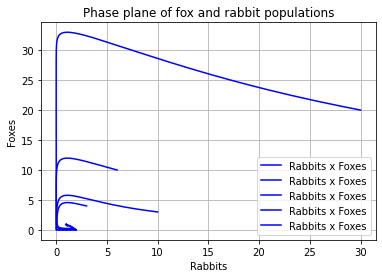

In [17]:
#
#  Nesse terceiro experimento, há predadores e presas, com diferentes condições iniciais. 
#
# Euler's method
#
# Não é o melhor, mas é o mais simples.
#
#
# X - rabbits
# Y - foxes
#
X_init = np.array([1,3,6,10,30])
Y_init = np.array([1,4,10,3,20])

f1 = p.figure()

for i in range(len(X_init)):
    
    X = np.array([X_init[i]])
    Y = np.array([Y_init[i]])

    for t in range(1, num_steps):
        factors = dX_dt(X[t-1],Y[t-1])

        xnew = X[t-1] + factors[0]*Delta_t
        ynew = Y[t-1] + factors[1]*Delta_t
    
        X = np.append(X, xnew)
        Y = np.append(Y, ynew)

        rabbits = X
        foxes   = Y

    p.plot(rabbits, foxes, 'b-', label='Rabbits x Foxes')
        
p.grid()
p.legend(loc='best')
p.xlabel('Rabbits')
p.ylabel('Foxes')
p.title('Phase plane of fox and rabbit populations')
f1.savefig('rabbits_and_foxes_4.png')

Com cinco diferentes condições iniciais, os valores ao longo do tempo convergiram para o terceiro ponto crítico. Vamos agora linearizar o sistema de equações diferenciais em cada um dos pontos críticos, calcular os autovalores do jacobiano nos pontos críticos e verificar se os pontos são sinks, sources ou pontos de cela (saddle).

$G = \frac{dR}{dt} = 2*R*(1 - \frac{R}{2}) - 1.2*R*F = 2*R-R^2-1.2*R*F$

$H = \frac{dF}{dt} = -F + 0.9*R*F$

O Jacobiano é calculado da seguinte forma:

$
\mathbf{J} =
\begin{bmatrix}
  \frac{\partial G}{\partial R} & 
    \frac{\partial G}{\partial F} \\[1ex] % <-- 1ex more space between rows of matrix
  \frac{\partial H}{\partial R} & 
    \frac{\partial H}{\partial F}  \\[1ex]
\end{bmatrix}
$
$
 =
\begin{bmatrix}
  2 - 2*R-1.2*F & 
    -1.2*R\\[1ex] % <-- 1ex more space between rows of matrix
  0.9*F & 
    -1 + 0.9*R  \\[1ex]
\end{bmatrix}
$

Vamos calcular os autovalores para cada um dos pontos críticos do sistema de equações diferenciais.

In [33]:
def Calc_eig_Jacobian(r,f):
    vector = np.array([[  2 - 2*r - 1.2*f, - 1.2*r],
                   [             0.9*f, -1+0.9*r]])

    w,v = eig(vector)
    
    return w

In [43]:
eigens_1 = Calc_eig_Jacobian(0,0)
eigens_2 = Calc_eig_Jacobian(2,0)
eigens_3 = Calc_eig_Jacobian(10/9,20/27)

print("Os autovalores do primeiro ponto crítico (0,0) são: ", eigens_1)
print("Os autovalores do segundo crítico (2,0) são: ", eigens_2)
print("Os autovalores do terceiro ponto crítico (10/9,20/27) são: ", eigens_3)

Os autovalores do primeiro ponto crítico (0,0) são:  [ 2. -1.]
Os autovalores do segundo crítico (2,0) são:  [-2.   0.8]
Os autovalores do terceiro ponto crítico (10/9,20/27) são:  [-0.55555556+0.7617394j -0.55555556-0.7617394j]


Os dois primeiros conjuntos de autovalores são reais e são pontos de cela (um positivo e outro negativo). São pontos instáveis. O terceiro conjunto é um complexo conjugado, com valor negativo da parte real. É um ponto estável. Na figura a seguir é mostrado o comportamento do sistema.

No handles with labels found to put in legend.


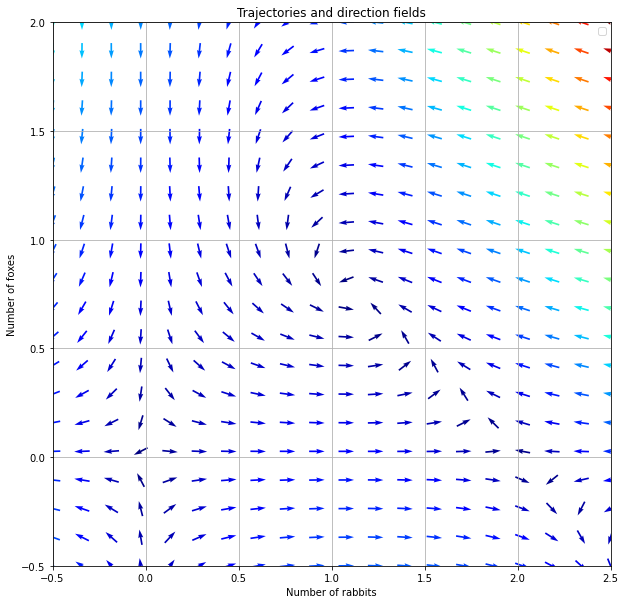

In [45]:
#-------------------------------------------------------
f2 = p.figure(figsize=(10,10))
#-------------------------------------------------------

nb_points   = 20
xmin = -0.5
xmax =  2.5
ymin = -0.5
ymax = 2

x = np.linspace(xmin, xmax, nb_points)
y = np.linspace(ymin, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt(X1, Y1)                      # compute growth rate on the gridt
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.legend()
p.grid()
p.xlim(xmin, xmax)
p.ylim(ymin, ymax)
f2.savefig('rabbits_and_foxes_3.png')
#